In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame, Series
import seaborn as sns
from matplotlib.pyplot import show
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
from collections import Counter
from sklearn.feature_selection import RFE

ModuleNotFoundError: No module named 'plotly'

In [191]:
ks=pd.read_csv("ks-projects-201801.csv")
ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [192]:
print(ks.shape[0], 'rows',',',ks.shape[1],'columns')

378661 rows , 15 columns


In [193]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [194]:
# Number of missing data in each column
ks.isnull().sum().sort_values(ascending=False)

usd pledged         3797
name                   4
usd_goal_real          0
usd_pledged_real       0
country                0
backers                0
state                  0
pledged                0
launched               0
goal                   0
deadline               0
currency               0
main_category          0
category               0
ID                     0
dtype: int64

In [195]:
ks.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [196]:
ks.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

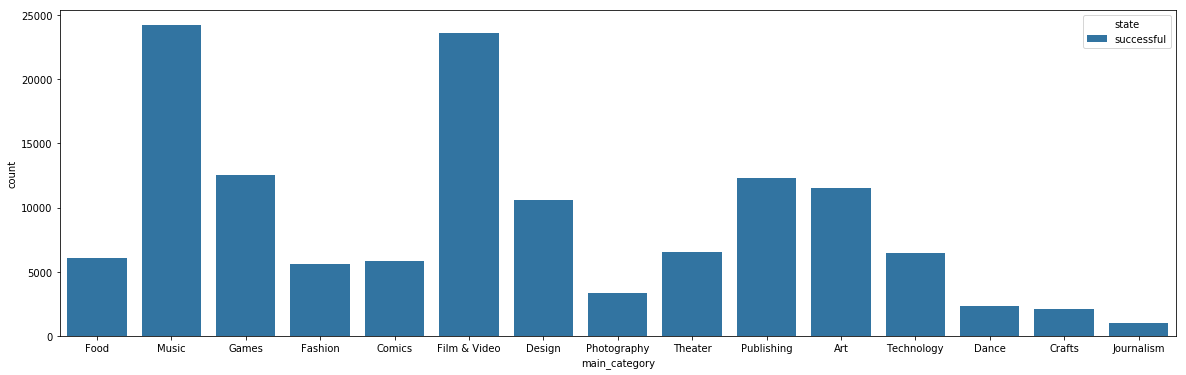

In [197]:
fig, axes = plt.subplots(figsize=(20,6))
Survival_palette = {0: "red", 1: "green"}
sns.countplot(x="main_category", hue="state", data=ks[ks.state == 'successful'])
show()

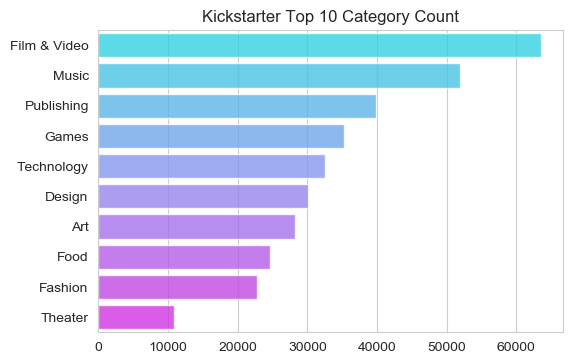

In [198]:
sns.set_style('whitegrid')
mains = ks.main_category.value_counts().head(10)

x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="cool", alpha=0.8)

plt.title('Kickstarter Top 10 Category Count')
plt.show()

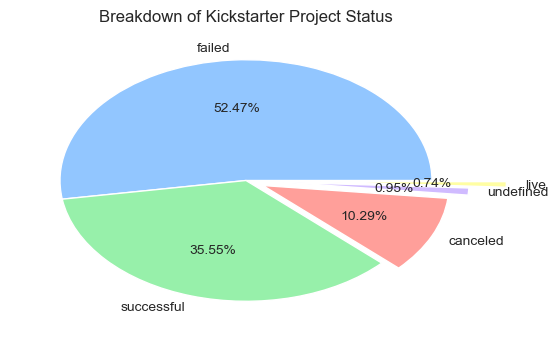

In [199]:
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(1, 1, dpi=100)
explode = [0,0,.1,.2, .4]
ks.state.value_counts().head(5).plot.pie(autopct='%0.2f%%',
                                        explode=explode)

plt.title('Breakdown of Kickstarter Project Status')
plt.ylabel('')
plt.show()

In [200]:
# Uniqueness of each columns
ks.nunique().sort_values()

state                    6
currency                14
main_category           15
country                 23
category               159
deadline              3164
backers               3963
goal                  8353
usd_goal_real        50339
pledged              62130
usd pledged          95455
usd_pledged_real    106065
name                375764
launched            378089
ID                  378661
dtype: int64

In [201]:
ks1 = ks[ks['usd pledged'].isnull()]
ks1.head(4)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.0,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.0,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.0,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.8,undefined,0,"N,0""",NaN,7007.80,6000.00


In [202]:
# Convert launched, and deadline to datetime objects
for col in ['launched', 'deadline']:
    ks.loc[:,col] = pd.to_datetime(ks[col], errors='coerce')
    
# drop projects with null launch and deadline dates
ks = ks.dropna()

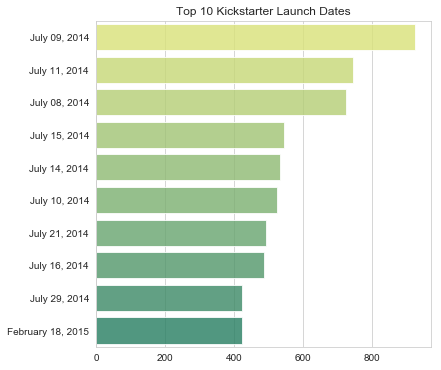

In [203]:
cats = ks.launched.dt.strftime('%B %d, %Y').value_counts().head(10)

x = cats.values
y = cats.index

fig = plt.figure(figsize=(6,6))
sns.barplot(y=y, x=x, orient='h', palette="summer_r", alpha=0.8)
# df.launched.dt.strftime('%B %d, %Y').value_counts().head(10).plot.barh()

plt.title('Top 10 Kickstarter Launch Dates')
plt.show()

In [205]:
ks['launched'] = pd.to_datetime(ks['launched'])
ks['laun_month_year'] = ks['launched'].dt.to_period("M")
ks['laun_year'] = ks['launched'].dt.to_period("A")
ks['laun_hour'] = ks['launched'].dt.hour

ks['deadline'] = pd.to_datetime(ks['deadline'])
ks['dead_month_year'] = ks['deadline'].dt.to_period("M")
ks['dead_year'] = ks['launched'].dt.to_period("A")

C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [206]:
#Creating a new columns with Campaign total months
ks['time_campaign'] = ks['dead_month_year'] - ks['laun_month_year']
ks['time_campaign'] = ks['time_campaign'].astype(int)

C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


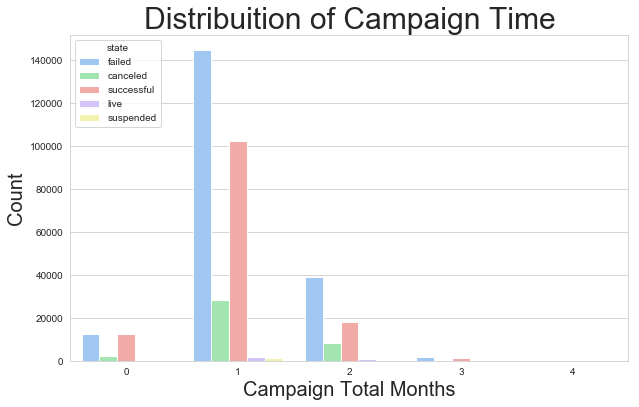

Descriptions of Campaign Time
state          canceled  failed  live  successful  suspended
time_campaign                                               
0                  2043   12266    62       12483        153
1                 28127  144412  1784      102023       1249
2                  8128   38944   948       18225        432
3                   453    1976     4        1117          8
4                     0      13     0           3          0


In [207]:
plt.figure(figsize = (10,6))

ax = sns.countplot(x='time_campaign', hue='state', 
                   data=ks[ks['time_campaign'] < 10])
ax.set_title("Distribuition of Campaign Time", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

print("Descriptions of Campaign Time")
print(pd.crosstab(ks[ks['time_campaign'] < 5]['time_campaign'], ks.state))

In [208]:
ks[ks['laun_month_year'] >= pd.Period('2017-01')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,laun_month_year,laun_year,laun_hour,dead_month_year,dead_year,time_campaign
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,...,US,100.00,2421.00,30000.00,2017-09,2017,4,2017-11,2017,2
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,...,GB,57763.78,121857.33,6469.73,2017-04,2017,19,2017-05,2017,1
21,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,2017-09-07,2500.0,2017-08-08 01:20:20,1.00,failed,...,AU,0.00,0.81,2026.10,2017-08,2017,1,2017-09,2017,1
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,...,US,10120.00,57577.31,50000.00,2017-04,2017,17,2017-05,2017,1
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.00,live,...,CA,185.65,472.88,2396.36,2017-11,2017,18,2018-01,2017,2
43,1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,2017-03-27,1500.0,2017-03-02 04:01:43,856.00,failed,...,US,324.00,856.00,1500.00,2017-03,2017,4,2017-03,2017,0
51,100020143,H2O The Underwater Portraits,People,Photography,USD,2017-10-30,9500.0,2017-09-25 17:17:43,6.00,failed,...,US,5.00,6.00,9500.00,2017-09,2017,17,2017-10,2017,1
67,1000256230,Shreddit - Privacy on Reddit,Software,Technology,GBP,2017-07-02,2000.0,2017-06-02 12:20:21,0.00,failed,...,GB,0.00,0.00,2579.35,2017-06,2017,12,2017-07,2017,1
90,1000348690,The Silence of Hollowind - Urban Fantasy RPG,Tabletop Games,Games,EUR,2017-11-23,5000.0,2017-10-24 16:58:01,11238.00,successful,...,IT,5509.51,13347.43,5938.52,2017-10,2017,16,2017-11,2017,1
106,10004373,Bad Example (A Southern Trailer Park Fairy Tal...,Shorts,Film & Video,USD,2017-05-08,1800.0,2017-04-03 23:25:55,22.00,failed,...,US,7.00,22.00,1800.00,2017-04,2017,23,2017-05,2017,1


In [209]:
ks.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'laun_month_year',
       'laun_year', 'laun_hour', 'dead_month_year', 'dead_year',
       'time_campaign'],
      dtype='object')

In [210]:
ks['diff_pledged_goal']= ks['usd_pledged_real']- ks['usd_goal_real']
ks

C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd pledged,usd_pledged_real,usd_goal_real,laun_month_year,laun_year,laun_hour,dead_month_year,dead_year,time_campaign,diff_pledged_goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,...,0.00,0.00,1533.95,2015-08,2015,12,2015-10,2015,2,-1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,...,100.00,2421.00,30000.00,2017-09,2017,4,2017-11,2017,2,-27579.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,...,220.00,220.00,45000.00,2013-01,2013,0,2013-02,2013,1,-44780.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,...,1.00,1.00,5000.00,2012-03,2012,3,2012-04,2012,1,-4999.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,...,1283.00,1283.00,19500.00,2015-07,2015,8,2015-08,2015,1,-18217.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,...,52375.00,52375.00,50000.00,2016-02,2016,13,2016-04,2016,2,2375.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,...,1205.00,1205.00,1000.00,2014-12,2014,18,2014-12,2014,0,205.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,...,453.00,453.00,25000.00,2016-02,2016,20,2016-03,2016,1,-24547.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,...,8233.00,8233.00,125000.00,2014-04,2014,18,2014-05,2014,1,-116767.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,...,6240.57,6240.57,65000.00,2014-07,2014,21,2014-08,2014,1,-58759.43


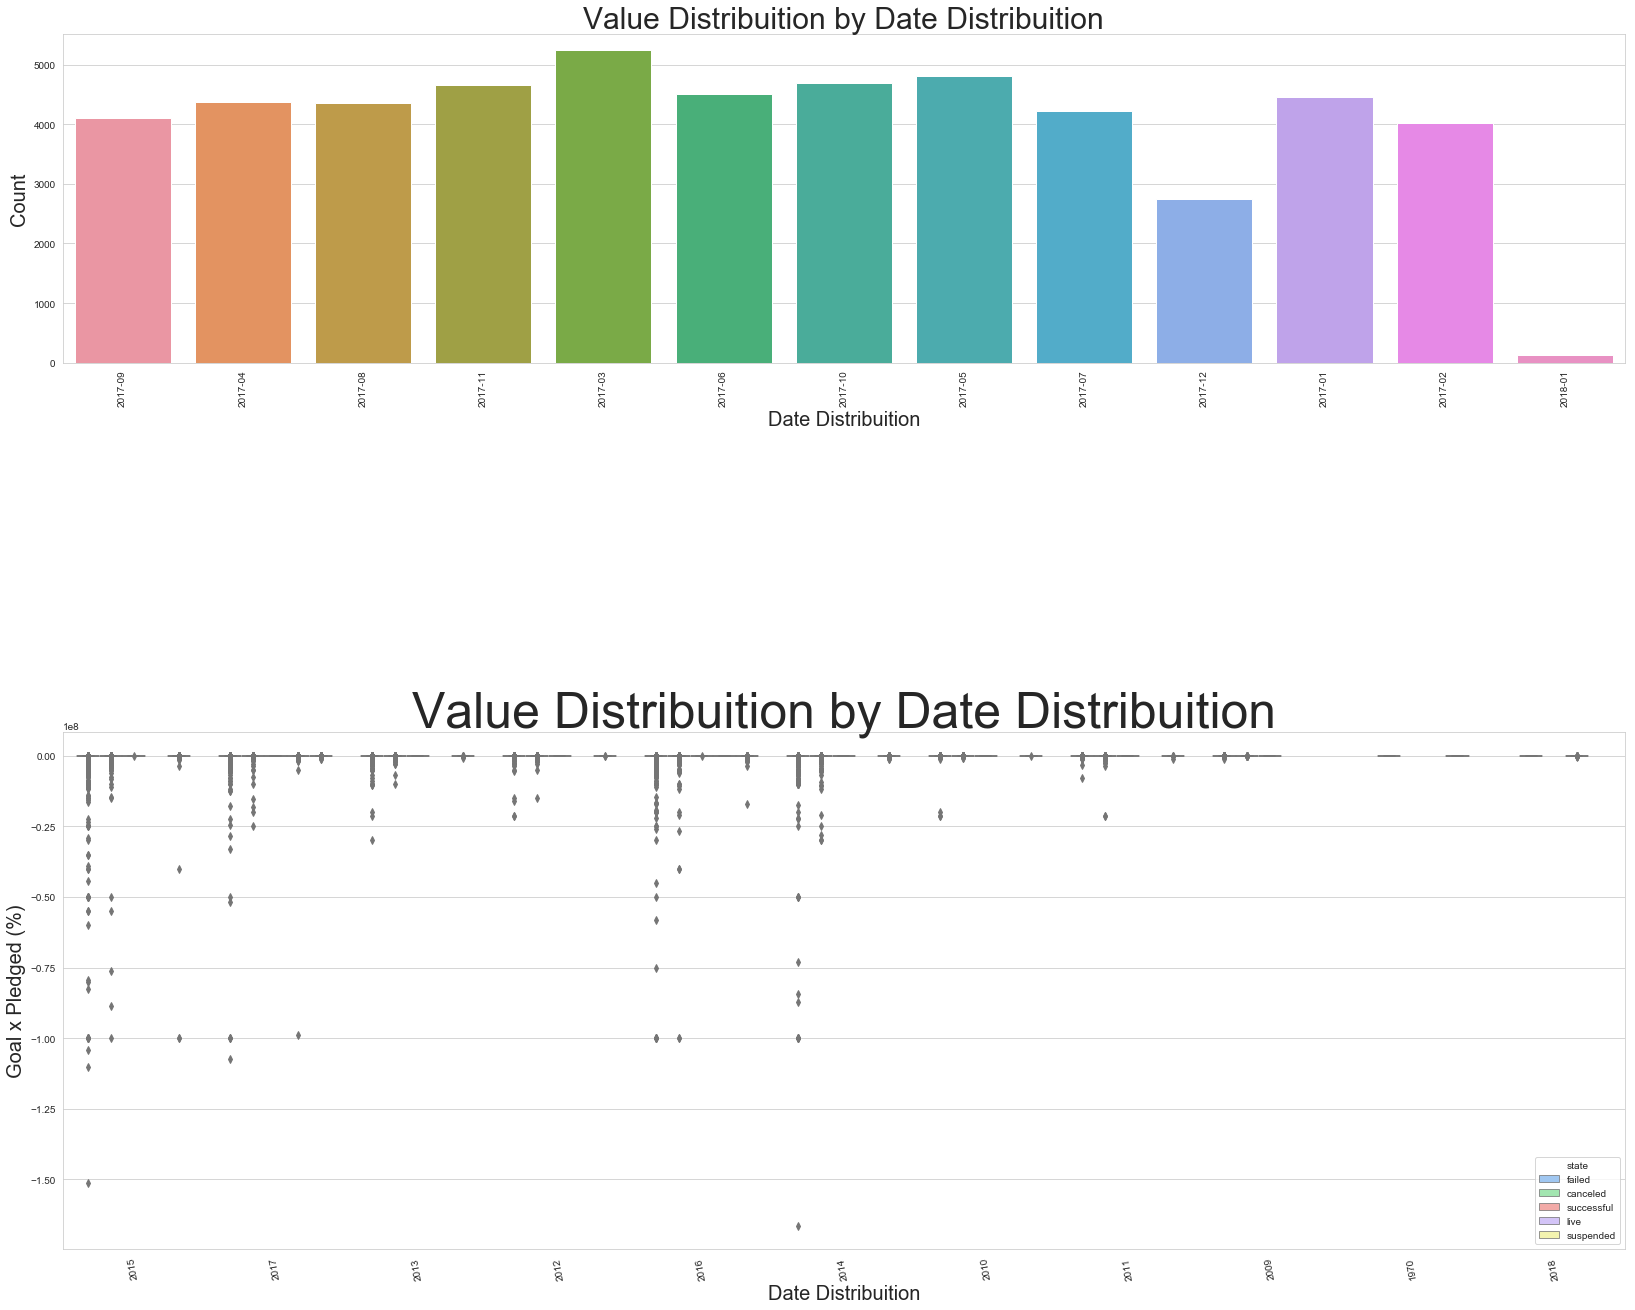

In [211]:
plt.figure(figsize = (28,25))

plt.subplots_adjust(hspace = 0.35, top = 0.8)

g1 = plt.subplot(311)
g1 = sns.countplot(x="laun_month_year", data=ks[ks["laun_month_year"] >= pd.Period('2017-01')])
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Value Distribuition by Date Distribuition", fontsize=30)
g1.set_xlabel("Date Distribuition", fontsize=20)
g1.set_ylabel("Count", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="laun_year", y="diff_pledged_goal",
                 data=ks[ks['diff_pledged_goal'] < 150], 
                 hue="state")
g2.set_xticklabels(g2.get_xticklabels(),rotation=100)
g2.set_title("Value Distribuition by Date Distribuition", fontsize=50)
g2.set_xlabel("Date Distribuition", fontsize=20)
g2.set_ylabel("Goal x Pledged (%)", fontsize=20)
plt.show()

In [212]:
features = ks.copy()
features['success'] = np.where(features.state == 'successful', 1, 0)
features['US'] = np.where(features.country=='US', 1,0)
features['length_chars'] = features.name.str.len()
features['contains_!'] = pd.get_dummies(features.name.str.contains('!'), drop_first=True)
features['contains_?'] = pd.get_dummies(features.name.str.contains(r'\?'), drop_first=True)

In [213]:
features['contains_title'] = pd.get_dummies(features.name.str.istitle(), drop_first=True)

In [214]:
features['log_goal'] = np.log10(features.goal)
features['log_usd pledged'] = np.log10(features.usd pledged)

SyntaxError: invalid syntax (<ipython-input-214-873db936878c>, line 2)

In [215]:
features['time_delta'] = (features.deadline.dt.date - features.launched.dt.date).dt.days

In [216]:
sns.set_style('darkgrid')

sns.distplot(features.log_goal, kde=False, bins=20)

plt.title('Distribution of Goal')
plt.plot()

AttributeError: 'DataFrame' object has no attribute 'log_goal'

In [ ]:
features = pd.concat([features, 
                      pd.get_dummies(features.launched.dt.dayofweek, prefix='day_of_week'),
                     pd.get_dummies(features.launched.dt.week, prefix='week'),
                     pd.get_dummies(features.launched.dt.year, prefix='year'),
                     pd.get_dummies(features.category)],
         axis=1)

In [217]:
features = features.iloc[:,15:]

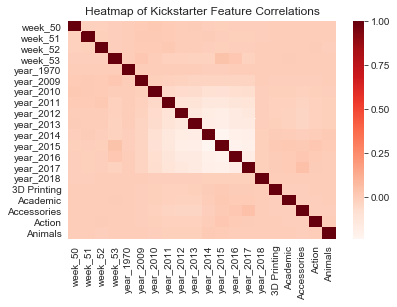

In [187]:
sns.heatmap(features.iloc[:, :20].corr(), cmap='Reds')

plt.title('Heatmap of Kickstarter Feature Correlations')
plt.show()

In [218]:
ks['log_usd_per_backer'] = np.log(ks['usd pledged']/ks['backers'])
ks['log_goal_per_backer'] = np.log(ks['goal']/ks['backers'])

C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mahmud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\mahmud\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\mahmud\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
C:\Users\mahmud\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


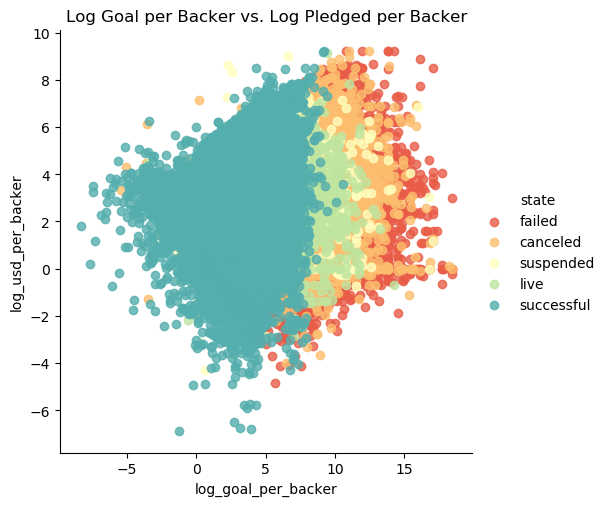

In [189]:
import matplotlib as mpl
# Reset matplotlib params
mpl.rcParams.update(mpl.rcParamsDefault)

sns.lmplot(x="log_goal_per_backer", y="log_usd_per_backer",
                hue="state",
                palette='Spectral',
                hue_order=['failed', 'canceled', 'suspended', 'live', 'successful'],
                data=ks)

plt.title("Log Goal per Backer vs. Log Pledged per Backer")
plt.show()